# Win an impossible classical challenge!
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
Imagine your team is faced with a challenger Eve that ask you to play and win the following game :

- split your team into two groups, say A and B
- Eve is independently going to give at each group an integer of value either 1,2 or 3. 
- group A, given value i, secretely gives to Eve three $\pm1$ digits say $a_{i1},a_{i2},a_{i3}$ such that their product is $1$
- group B, given value j, secretely gives to Eve three $\pm1$ digits say $b_{1j},b_{2j},b_{3j}$ such that their product is $-1$
- The game is won by the team if the two sequences of digits given by the two groups coincide at the "matrix-element" $ij$, that is if $a_{ij}=b_{ij}$

For example, if Eve sends 1 to group A and 2 to group B, then group A could send $[a_{i1},a_{i2},a_{i3}]=[-1,-1,1]$
and group B could send $b_{1j},b_{2j},b_{3j}=[-1,1,1]$. This would be a winning answer since :

$$
\left\{
    \begin{array}{lll}
        a_{i2}=-1=b_{1j} \\
        a_{i1}\cdot a_{i2}\cdot a_{i3}=1 \\
        b_{1j} \cdot b_{2j} \cdot b_{3j}=-1
    \end{array}
\right.
$$

Before the game starts, both group can plan any strategy they want in order to maximise their chance to win the game, but when the game starts both teams get separated far from each other and cannot exchange information through any classical channel.

The goal of this problem is to implement a strategy based on quantum phenomenons and more precisely the entanglement phenomenon that allows to win the game everytime, which would be impossible with a classical strategy.



**Task 1 :** argue why the challenge is impossible to win with probability 1 using a classical strategy. That is, if group A and B decide to give their answer following a deterministic strategy materialised through a predetermined $3 \times 3$-matrix $M$ of elements $\pm1$ where at input $(i;j)$, A and B would answer row $i$ and column $j$ so to achieve $a_{ij}=b_{ij}$, then this procedure cannot garantee to give a product of 1 and -1 for row $i$ and colum $j$ at every input $(i,j)$ sent by Eve.

Example of such a strategy :

\begin{bmatrix}
1 & 1 & 1\\
-1 & 1 & -1\\
1 & -1 & -1
\end{bmatrix}

What input from Eve would lead to an incorrect answer following this strategy ? 

We can see that using this strategy allows to win the game 8 out of 9 time and this is in fact the best frequence we can hope with a classical strategy. 


Your response here :

ANSWER:

Winning everytime requires each column of the matrix to have an odd number of "-1" and each row to have an even number of "-1".

However, if each column has an odd number of "-1", it implies that the total number of "-1" in the martrix is odd. On the other hand, if each row has an even number of "-1" then the total number of "-1" must be even.

This proves that the requirements to win everytime cannot be met at the same time and therefore it is impossible to win everytime.

2. Hopefully, the experience of Aspect in 1982 showed that we don't live in a classical world and the recent progress of quantum computing has now made possible to win this challenge with probability 1. In the following we will see how this is achieved.

During the planning of the strategy, group A and B of your team prepare 4 qubits $A_1, A_2,B_1,B_2$ in a entangled state : 

$$|\phi \rangle_{AB}=\frac{1}{\sqrt{2}} \ket{B_{00}}_{AB}\otimes\frac{1}{\sqrt{2}} \ket{B_{00}}_{AB}=\frac{1}{\sqrt{2}} (\ket{00}_{A_1,B_1}+\ket{11}_{A_1,B_1}) \otimes \frac{1}{\sqrt{2}} (\ket{00}_{A_2,B_2}+\ket{11}_{A_2,B_2}) $$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
and they agree on the following table $\mathcal{Q}$:

\begin{array}{|l|c|r|}
\hline
\sigma_x \otimes \sigma_x & \sigma_x \otimes I & I \otimes \sigma_x \\ \hline
\sigma_y \otimes \sigma_y & -\sigma_x \otimes \sigma_z & -\sigma_z \otimes \sigma_x\\ \hline
\sigma_z \otimes \sigma_z & I \otimes \sigma_z &  \sigma_z \otimes I \\
\hline
\end{array}
Where $\sigma_x, \sigma_y, \sigma_z$ are the Pauli matrices :

$$
\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix};
\begin{bmatrix}
0 &-i\\
i & 0
\end{bmatrix};
\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
$$


**Task 2 :** Importing standard Qiskit libraries, code and draw a quantum circuit preparing the desired state $|\phi \rangle_{AB}$

In [65]:
#your code
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
from IPython.display import display, Math
from qiskit.visualization import plot_histogram

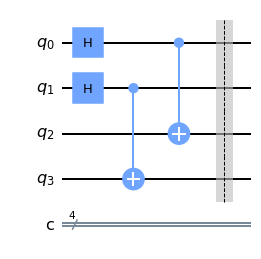

In [63]:
circuit_initial_state = QuantumCircuit(4,4)
circuit_initial_state.h([0,1])
circuit_initial_state.cx(1,3)
circuit_initial_state.cx(0,2)
circuit_initial_state.barrier()
circuit_initial_state.draw('mpl')

In [47]:
state = Statevector.from_int(0, 2**4)
display(Math(state.draw('latex_source')))
state = state.evolve(circuit_initial_state)
display(Math(state.draw('latex_source')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# The measurement postulate

To proceed further, we explain the following aspect of the measurement postulate :

1. an observable is a measurable quantity described by an hermitian matrix
2. the measurement apparatus projects the state (or wave function) on one of the eigen-basis vector $\ket{v}$
3. the value of the observable is given by the eigen value associated with the eigen vector 
4. simultaneous measurements of many observables are only possible for commuting observables since they must have commun eigen basis
5. the Born rule states that $\mathcal{P}(\ket{\phi} \rightarrow \ket{v})= |\langle v|\phi \rangle|^2$. If an eigen value is degenerate the probability of measuring this eigen value is the sum of these probabilities over corresponding eigenvectors.

The **key observation** we can make on the table of observables $\mathcal{Q}$ given above is :
$$\prod_k \mathcal{Q}_{i,k} = I$$
and
$$\prod_k \mathcal{Q}_{k,j} = -I$$

$I$ being the identity matrix. When measuring simultaneously the observable in a row or colum, the product of the eigen values for each observable will then be 1 or -1 respectively, and thus the challenge constraints will be achieved.



# List of the common basis

Simultaneous measurements over different observables are possible only for commutative observables (otherwise what is the problem?). Hence, after checking that the observables in rows and columns indeed commute, we know that a common basis exists and we can make the measurements of those observables in such a basis. However, measurements on Qiskit are only made according to the usual basis, that is in the case of for 4 qubits : 

$$\mathcal{B}= \{\ket{\uparrow\uparrow}, \ket{\uparrow\downarrow}, \ket{\downarrow\uparrow}, \ket{\downarrow\downarrow} \}$$

Hence, we should find a way to convert the common basis for a row/colum into the usual basis so that the outcome of the measurements can be correctly deduced. We will see that it can be done directly by adding some quantum gates at the end of the circuit. 

We recall that hermitian matrix are diagonalisable and have real eigen value, that is among others what allows to interpret the square projection of an observable as a probability. A **common basis** for several hermitian matrices (or observables) is a set of vectors in which each hermitian matrices can be diagonalised.

After some calculations, we can find the common basis for rows and colums. Here they are :  

For group A :

$$\mathcal{B}^{A}_1= \{\ket{++}, \ket{+-}, \ket{-+}, \ket{--} \}$$

$$\mathcal{B}^{A}_2= \{\ket{\uparrow\uparrow}+\ket{\uparrow\downarrow}+\ket{\downarrow\uparrow}-\ket{\downarrow\downarrow},
\ket{\uparrow\uparrow}-\ket{\uparrow\downarrow}+\ket{\downarrow\uparrow}+\ket{\downarrow\downarrow},
\ket{\uparrow\uparrow}+\ket{\uparrow\downarrow}-\ket{\downarrow\uparrow}+\ket{\downarrow\downarrow},
\ket{\uparrow\uparrow}-\ket{\uparrow\downarrow}-\ket{\downarrow\uparrow}-\ket{\downarrow\downarrow} \}$$

$$\mathcal{B}^{A}_3= \{\ket{\uparrow\uparrow}, \ket{\uparrow\downarrow}, \ket{\downarrow\uparrow}, \ket{\downarrow\downarrow} \}$$

For group B :

$$\mathcal{B}^{B}_1= \{\ket{\uparrow\uparrow}+\ket{\downarrow\downarrow},\ket{\uparrow\downarrow}+\ket{\downarrow\uparrow},\ket{\uparrow\uparrow}-\ket{\downarrow\downarrow},\ket{\uparrow\downarrow}-\ket{\downarrow\uparrow} \}$$

$$\mathcal{B}^{B}_2= \{\ket{+}\otimes \ket{\uparrow},  \ket{+}\otimes\ket{\downarrow},\ket{-}\otimes\ket{\uparrow},
\ket{-}\otimes\ket{\downarrow} \}$$


$$\mathcal{B}^{B}_3= \{\ket{\uparrow\uparrow}+\ket{\uparrow\downarrow}, \ket{\uparrow\uparrow}-\ket{\uparrow\downarrow}, \ket{\downarrow\uparrow}+\ket{\downarrow\downarrow},\ket{\downarrow\uparrow}-\ket{\downarrow\downarrow} \}$$





**Task 3** : code and draw a 2 qubits circuit which, for a random state $\psi = \alpha \ket{\uparrow} + \beta \ket{\downarrow}$ expressed in the usual basis $\mathcal{B}$, express this state in terms of the basis $\mathcal{B}^{B}_2$.

*Hint: express the vector of $\mathcal{B}^{B}_2$ in terms of the vectors of $\mathcal{B}$ and the identity matrix $I$ and the Hadamard matrix $H$.*

ANSWER:

$$\mathcal{B}^{B}_2=\{\ket{\uparrow\uparrow}+\ket{\downarrow\uparrow},
\ket{\uparrow\downarrow}+\ket{\downarrow\downarrow},
\ket{\uparrow\uparrow}-\ket{\downarrow\uparrow},
\ket{\uparrow\downarrow}-\ket{\downarrow\downarrow}\}$$

Hence:
$$\mathcal{B}^{B}_2 = (H\otimes I) \mathcal{B}$$

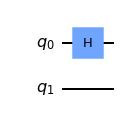

In [48]:
#your code
circuit_B_B_2 = QuantumCircuit(2)
circuit_B_B_2.h(0)
circuit_B_B_2.draw('mpl')

Sanity check:

In [49]:
state = Statevector.from_int(2, 2**2) + Statevector.from_int(3, 2**2)
display(Math(state.draw('latex_source')))
state = state.evolve(circuit_B_B_2)
display(Math(state.draw('latex_source')))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We also express $\mathcal{B}^{A}_1$:
$$\mathcal{B}^{A}_1 = (H\otimes H) \mathcal{B}$$

We build the corresponding circuit:

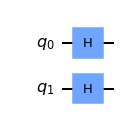

In [50]:
circuit_B_A_1 = QuantumCircuit(2)
circuit_B_A_1.h([0,1])
circuit_B_A_1.draw('mpl')

**The strategy**

During the separation, group A takes to his laboratory the qubits $A_1$ and $A_2$, group B takes to his laboratory the qubits $B_1$ and $B_2$. 

Once the game starts on input $(i,j)$, group A performs the measurement of its two qubits according to the observables in row $i$ of the table $\mathcal{Q}$, that is, projects the state $\mathcal{Q}_{i,k}\ket{A_1A_2}$ entangled with $B_1$ and $B_2$  onto the common basis $\mathcal{B}_i^A$ and then look at the possible outcomes $\ket{a_1a_2}_k$ of the projected states which will arise. Considering this state outcome, group A then outputs the corresponding eigenvalues $a_{ik}$ of the state by looking at the observables $\mathcal{Q}_{i,k}$ diagonalised in $\mathcal{B}_i^A$.

Group B proceeds in a similar fashion with the observables on colums j. 

Using an simulator will produce valid state outcomes (that is, theoretically true) but in pratice on a real quantum machine there is a lot of noise and so we have to repeat the experiment several times to see the true outcomes emerging from the remaining possible outcomes.

# Implementation for special case (i,j)=(1,2)

**Task 4 :** code a circuit which output the histogram of the measurement outcomes for a number of 1024 simulations, in the special case of (i,j)=(1,2).

*Hint: you should apply the right changes of basis to the corresponding qubits of A and B.*


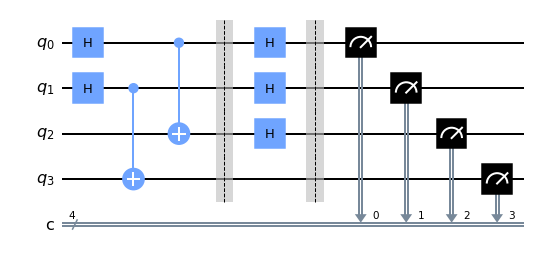

In [64]:
circuit = circuit_initial_state.copy()
circuit.h([0,1])
circuit.h(2)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)
circuit.measure(3,3)
circuit.draw('mpl')

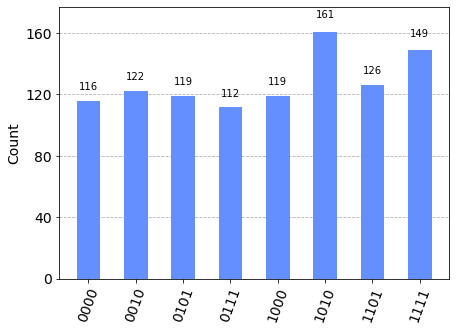

In [71]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(transpile(circuit, backend), shots=1024).result()
counts  = result.get_counts(circuit)
plot_histogram(counts)

**Answering to Eve given the measurement outcomes**

On qiskit the outcomes are read in reversed order compared to the order of the qubit appearing in the circuit (from $q[0]$ to $q[3]$). So from an outcome $b_2b_1a_2a_1$ of your choice, deduce a valid answer for group A and group B.

*hint :* The observables can be calculated from $\mathcal{Q}$ and then diagonalised according to the correct basis of group A and B.

The diagonalised observables for $\mathcal{B}^{A}_1$ are : 

$$
Q_{1,1}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
  ;  Q_{1,2}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
  ;  Q_{1,3}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$$

The diagolised observables for $\mathcal{B}^{B}_2$ are : 
$$
Q_{1,2}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
  ;  Q_{2,2}=
\begin{pmatrix}
-1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
  ;  Q_{3,2}=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\  
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$$



Your response here : 

ANSWER:

Let's take $b_2b_1a_2a_1 = 0111$, then the observables $Q_1,k$ diagonalized in $\mathcal{B}^A_1$ outcome:
$$a_{11}=1, a_{12}=-1, a_{13}=-1$$
and the observables diagonalized in  $\mathcal{B}^B_2$ outcome:
$$b_{12}=-1, b_{22}=1, b_{32}=1$$

Hence $a_{11}\cdot a_{12} \cdot a_{13} = 1$, $b_{12}\cdot b_{22} \cdot b_{32} = -1$ and $a_{12}=b_{12}=-1$

**Task 5 :** give a code which outputs the histogram of the measurement outcomes for a number of 1024 simulations, in the special, for all input (i,j) that Eve could ask : 

*hint : you can use disjonction cases inside the code of the circuit* 

ibmqfactory.load_account:WARNING:2022-11-29 20:24:40,844: Credentials are already in use. The existing account in the session will be replaced.


{'1101': 1098, '1010': 987, '0000': 1027, '0010': 979, '0111': 1038, '1111': 989, '0101': 1049, '1000': 1025}


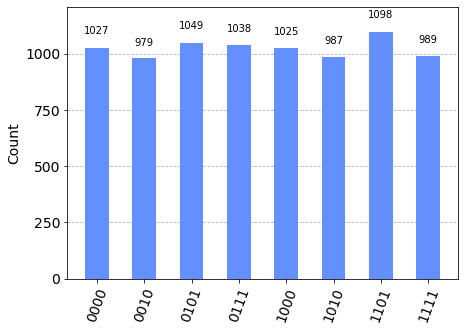

In [8]:
# your code